# HR Analytics Project- Understanding the Attrition in HR

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

# PROBLEM STATEMENT: 

#### we will predict whether the employee leave the company or not by analysing different features.

### WORK:

1) IMPORTING LIBRARIES

2) LOADING DATASET & DESCRIPTION

3) DATA PREPROCESSING

4) EXPLORATORY DATA ANALYSIS

5) SPLITING DATA AND APPLYING train_test_split

6) FINDING BEST RANDOM STATE

7) PREDCTING WHETHER EMPLOYEE LEAVE FIRM OR NOT USING DIFFERENT ALGORITHMS

8) GRID SEARCH CV

9) TUNNING WITH BEST PARAMETERS

10) SAVING OUR MODEL

11) CONCLUSION

In this context, the use of classification models to predict if an employee is likely to quit or not.

The key of success is to understand the current situation of the employee and taking action that can prevent attrition of the employee.

In [1]:
#importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
import warnings
warnings.filterwarnings("ignore")

In [99]:
#loading dataset

df= pd.read_csv("HR_attrition.csv")

In [100]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [101]:
# first 5 rows of dataset

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [102]:
#last 5 rows of dataset

df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [104]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# ATTRIBUTE INFORMATION

##### AGE:	Numerical Value

##### ATTRITION:	Employee leaving the company (0=no, 1=yes)

##### BUSINESS TRAVEL:	No Travel, Travel Frequently, Tavel Rarely

##### DAILY RATE: 	Numerical Value - Salary Level

##### DEPARTMENT: 	HR, R&D, Sales

##### DISTANCE FROM HOME:	 THE DISTANCE FROM WORK TO HOME

##### EDUCATION:	STUDIES

##### EDUCATION FIELD:	HR, LIFE SCIENCES, MARKETING, MEDICAL SCIENCES, OTHERS, TEHCNICAL

##### EMPLOYEE COUNT:	Numerical Value

##### EMPLOYEE NUMBER:	 EMPLOYEE ID

##### ENVIROMENT SATISFACTION: SATISFACTION WITH THE ENVIROMENT

##### GENDER:	FEMALE, MALE

##### HOURLY RATE	: HOURLY SALARY

##### JOB INVOLVEMENT: 	Numerical Value - JOB INVOLVEMENT

##### JOB LEVEL:  Numerical Value - LEVEL OF JOB

##### JOB ROLE	HC REP, HR, LAB TECHNICIAN, MANAGER,  MANAGING DIRECTOR,  REASEARCH DIRECTOR,  RESEARCH SCIENTIST, SALES EXECUTIEVE, SALES REPRESENTATIVE

##### JOB SATISFACTION:	 SATISFACTION WITH THE JOB

##### MARITAL STATUS:	DIVORCED, MARRIED, SINGLE

##### MONTHLY INCOME	:  MONTHLY SALARY

##### MONTHY RATE:	Numerical Value - MONTHY RATE

##### NUMCOMPANIES WORKED	:  NO. OF COMPANIES WORKED AT

##### OVER 18:	YES, NO

##### OVERTIME:	NO, YES

##### PERCENT SALARY HIKE	: PERCENTAGE INCREASE IN SALARY

##### PERFORMANCE RATING:	RATING ACCORDING TO PERFORMANCE

##### RELATIONS SATISFACTION:	 RELATIONS SATISFACTION WITH OTHERS

##### STANDARD HOURS	: WORKING STANDARD HOURS

##### STOCK OPTIONS LEVEL	: STOCK OPTIONS

##### TOTAL WORKING YEARS:  TOTAL YEARS WORKED/ EXPERIENCE

##### TRAINING TIMES LAST YEAR	: HOURS SPENT ON TRAINING

##### WORK LIFE BALANCE	: TIME SPENT BEWTWEEN WORK AND OUTSIDE

##### YEARS AT COMPANY	: TOTAL NUMBER OF YEARS AT THE COMPNAY WORKED

##### YEARS IN CURRENT ROLE	:YEARS IN CURRENT PROFILE

##### YEARS SINCE LAST PROMOTION	:LAST PROMOTION

##### YEARS WITH CURRENT MANAGER	: YEARS SPENT WITH CURRENT MANAGER

# Preprocessing the dataset

#### CHECKING MISSING VALUES

In [105]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

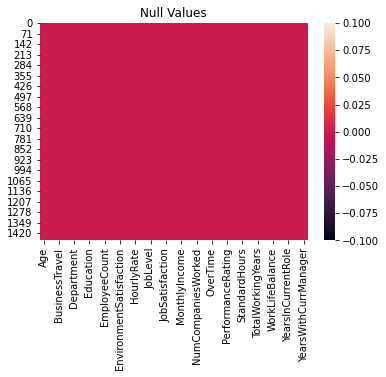

In [106]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

#### we can clearly visulaize that there is no null values present in our dataset.¶

# DESCRIBING DATASET

The measures of central tendency and distribution are some measures to define the data set.

The measures used to define the central tendency are mean, median and mode.

The standard deviations (or variance) are the minimum and maximum values of variables. The table below is a summary of some statistical measures for each numeric predictor of the dataset:

count: It indicates the number of records for each attribute that corresponds to the number of Attrition.

mean: It indicates the average value around which each group of attributes is attested.

std (Standard Deviation): It indicates the standard deviation of each attribute group, from which we can guess the degree of data dispersion around the average.

max and min indicate the attribute that I assume the highest and lowest value for each attribute group.

In [107]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [108]:
# Look at the values in each columns 
for i in df:
    print(df[i].value_counts())
    print("____________________________________________________________")

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
____________________________________________________________
No     1233
Yes     237
Name: Attrition, dtype: int64
____________________________________________________________
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
____________________________________________________________
691     6
1082    5
329     5
1329    5
530     5
       ..
897     1
891     1
889     1
888     1
102     1
Name: DailyRate, Length: 886, dtype: int64
____________________________________________________________
Research & Development   

In [109]:
df["EmployeeCount"].unique()

array([1], dtype=int64)

1    1470
Name: EmployeeCount, dtype: int64

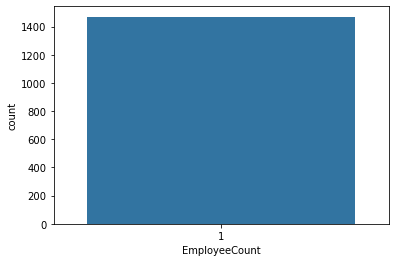

In [110]:
sns.countplot(x='EmployeeCount', data = df)
df["EmployeeCount"].value_counts()

EmployeeCount has only one unique value.

this feature is not contributing in our analysis.

we will drop this column.

In [111]:
df["EmployeeNumber"].unique()

array([   1,    2,    4, ..., 2064, 2065, 2068], dtype=int64)

"EmployeeNumber" has lot of unique values.

this is also not contributing in our analysis.

In [112]:
df["Over18"].unique()

array(['Y'], dtype=object)

"Over18" has only one unique value. Hence, we will drop this.

Y    1470
Name: Over18, dtype: int64

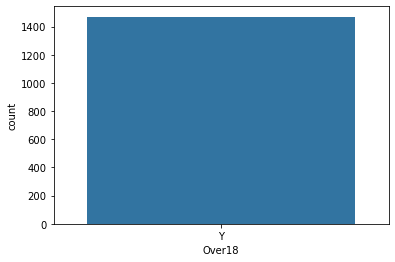

In [113]:
sns.countplot(x='Over18', data = df)
df["Over18"].value_counts()

In [114]:
df["StandardHours"].unique()

array([80], dtype=int64)

"StandardHours" has only one unique value. Hence, drop this

80    1470
Name: StandardHours, dtype: int64

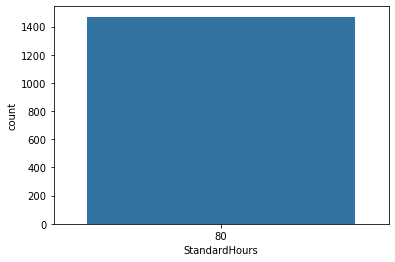

In [115]:
sns.countplot(x='StandardHours', data = df)
df["StandardHours"].value_counts()

In [116]:
# Remove useless column

df=df.drop('Over18',axis=1)
df=df.drop("EmployeeNumber", axis=1)
df= df.drop("EmployeeCount", axis=1)
df= df.drop("StandardHours", axis=1)

df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [117]:
df.columns.size

31

# Exploratory Data Analysis (EDA)

No     1233
Yes     237
Name: Attrition, dtype: int64

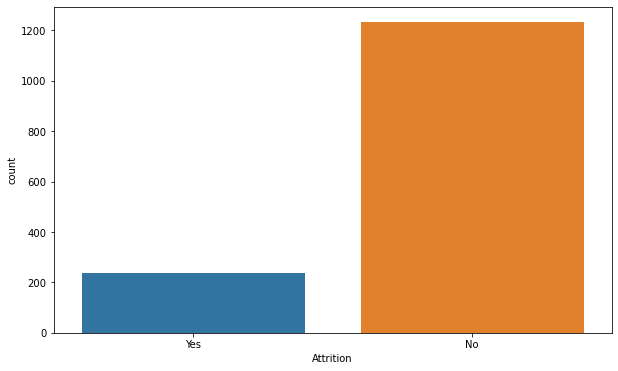

In [118]:
plt.figure(figsize=(10, 6))
sns.countplot(df["Attrition"],data=df)
df["Attrition"].value_counts()

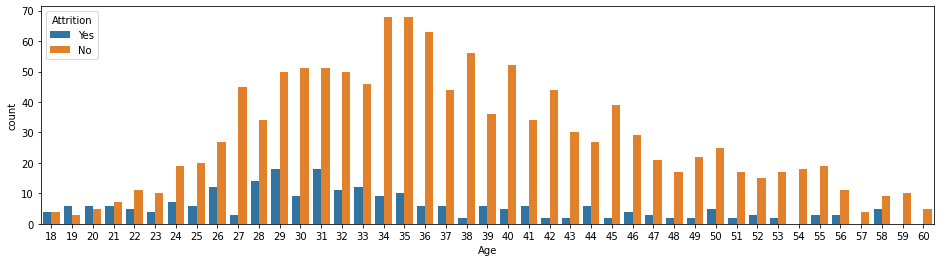

In [119]:
plt.subplots(figsize=(16,4))
sns.countplot(x="Age",hue="Attrition",data=df)

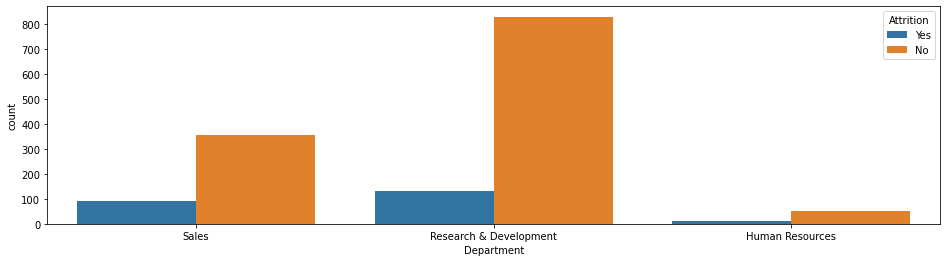

In [120]:
plt.subplots(figsize=(16,4))
sns.countplot(x="Department",hue="Attrition",data=df)

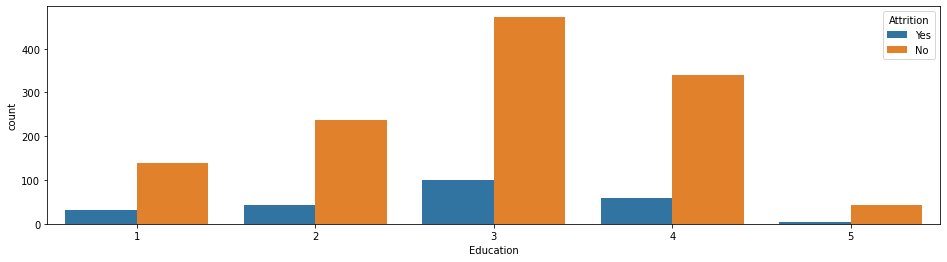

In [121]:
plt.subplots(figsize=(16,4))
sns.countplot(x="Education",hue="Attrition",data=df)

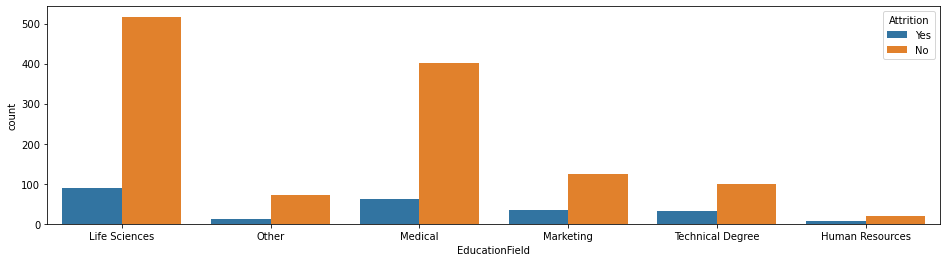

In [122]:
plt.subplots(figsize=(16,4))
sns.countplot(x="EducationField",hue="Attrition",data=df)

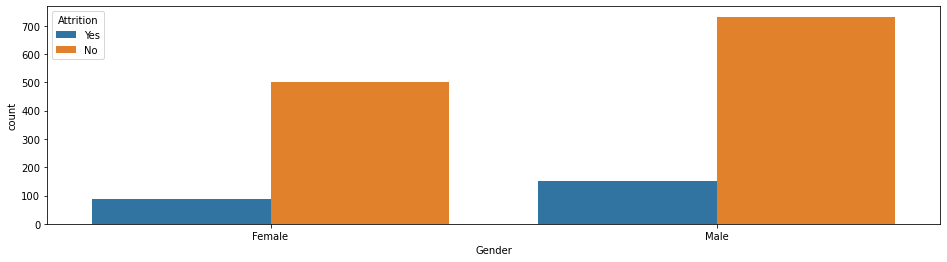

In [123]:
plt.subplots(figsize=(16,4))
sns.countplot(x="Gender",hue="Attrition",data=df)

In [124]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


# FINDING CORRELATION

In [126]:
corr= df.corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


This data set has many different features and it is important to understand relationship between these in order to analyze dataset better which will help in our predictions of Average price of Avacados. For that reason, correlation map helps to understand these relations in a single representation. Correlation map is made by calculating the covariance of each features with respect to others, then each covariance value is divided by standard deviation of each variables and get results between -1, 0, 1.

-1 means: Shows negative relationship between dependent and independent variables .

0 means: Shows no relationship between dependent and independent variables .

1 means: Shows a positive relationship between dependent and independent variables .

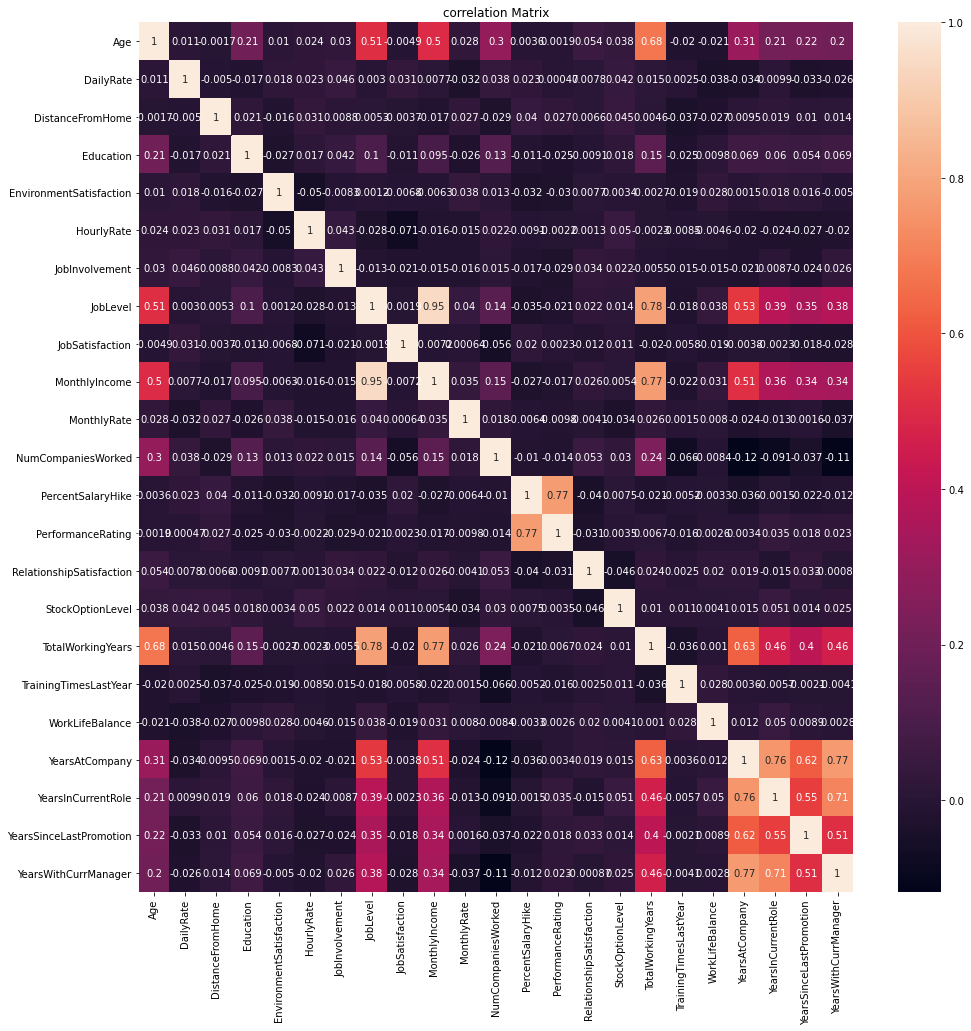

In [127]:
# Visualizing correlation

corr_mat=df.corr()   

plt.figure(figsize=[16,16])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show()

# Checking outliers

In [129]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

<function matplotlib.pyplot.show(*args, **kw)>

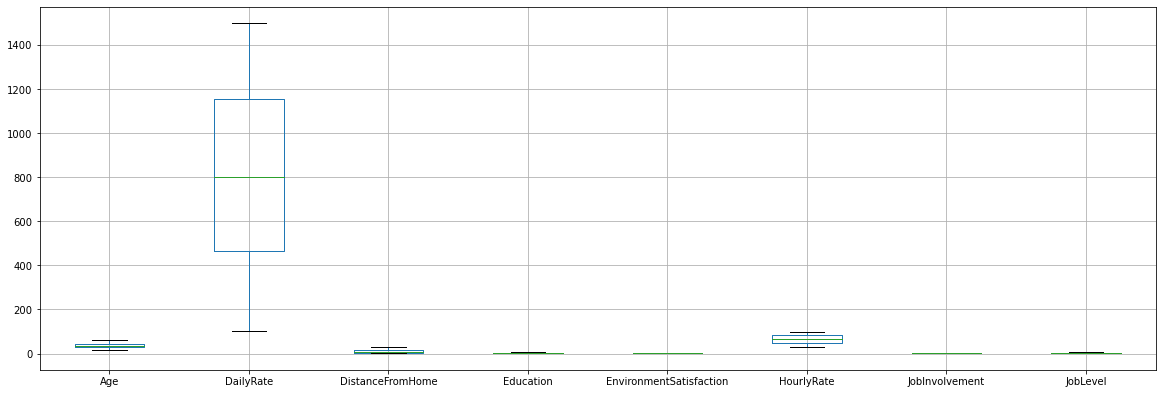

In [131]:
df.iloc[:,0:13].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

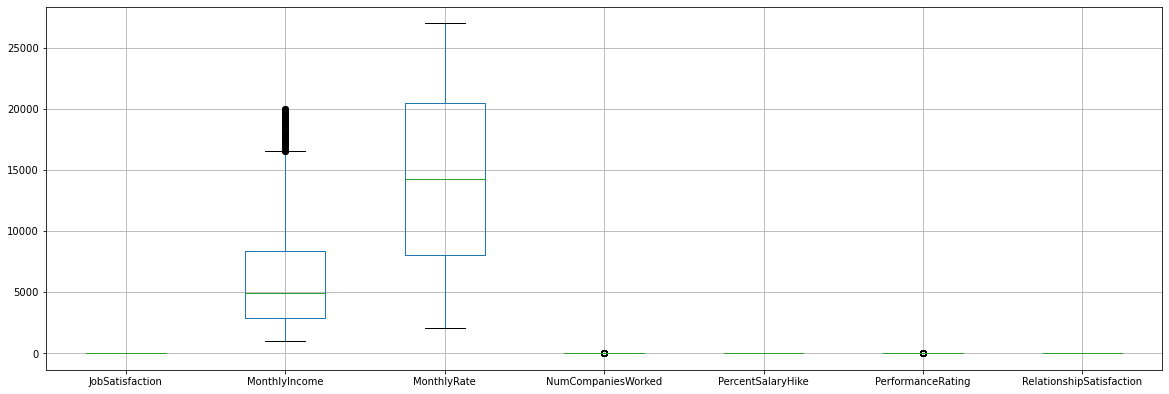

In [133]:
df.iloc[:,13:23].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

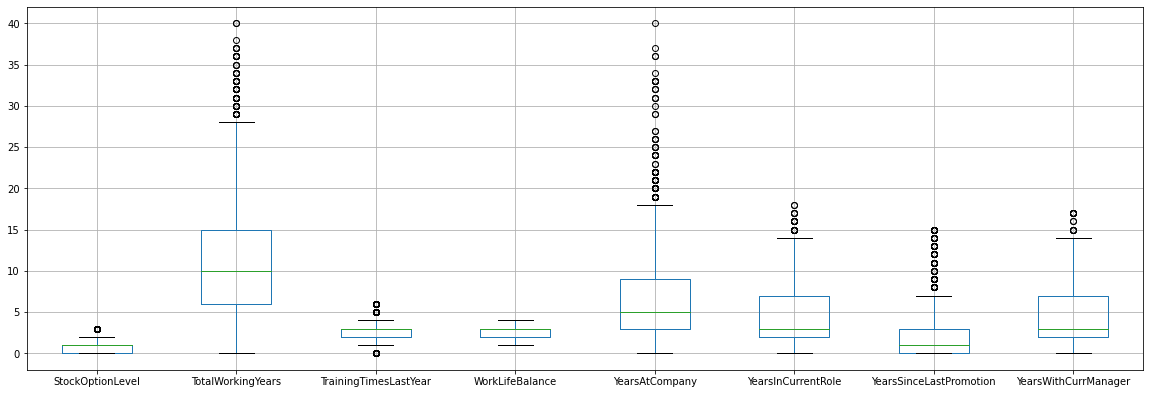

In [134]:
df.iloc[:,23:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show

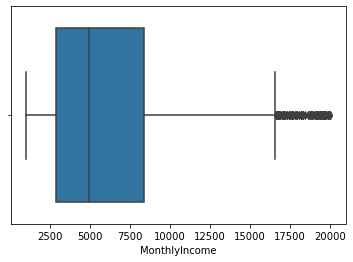

In [135]:
sns.boxplot(df["MonthlyIncome"])

some outliers present.

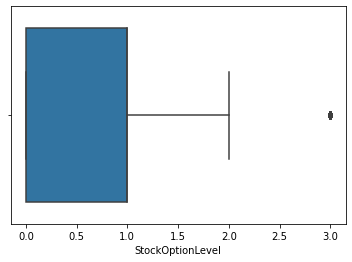

In [136]:
sns.boxplot(df["StockOptionLevel"])

only one outlier present.

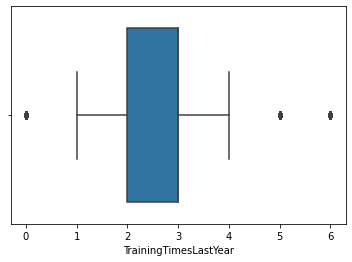

In [137]:
sns.boxplot(df["TrainingTimesLastYear"])

3 outliers present

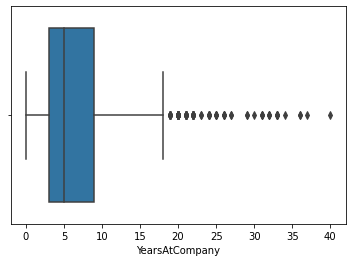

In [138]:
sns.boxplot(df["YearsAtCompany"])

few outliers present.

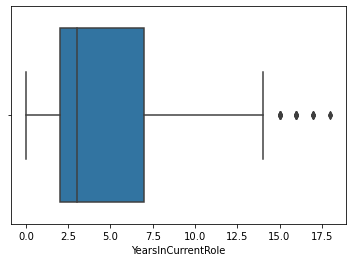

In [139]:
sns.boxplot(df["YearsInCurrentRole"])

4 outliers present.

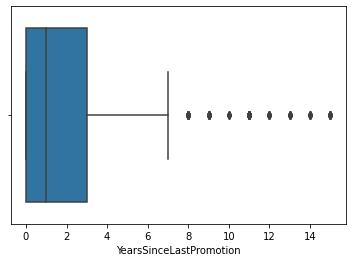

In [140]:
sns.boxplot(df["YearsSinceLastPromotion"])

some outliers present.

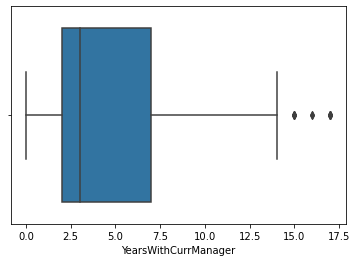

In [141]:
sns.boxplot(df["YearsWithCurrManager"])

3 outliers present.

# SKEWNESS

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.

If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.

If the skewness is less than -1 or greater than 1, the data are highly skewed.



In [143]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

not highly skewed feature present.

# SCALING

It helps to normalise the data within a particular range 0-1.

In [158]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

df=pd.DataFrame(scaler.fit_transform(df), columns= df.columns)

In [159]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,1.0,0.715820,1.0,0.000000,0.25,0.2,0.333333,0.0,...,0.0,0.000000,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,0.738095,0.0,0.5,0.126700,0.5,0.250000,0.00,0.2,0.666667,1.0,...,1.0,1.000000,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,0.452381,1.0,1.0,0.909807,0.5,0.035714,0.25,0.8,1.000000,1.0,...,0.0,0.333333,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,0.357143,0.0,0.5,0.923407,0.5,0.071429,0.75,0.2,1.000000,0.0,...,0.0,0.666667,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,0.214286,0.0,1.0,0.350036,0.5,0.035714,0.00,0.6,0.000000,1.0,...,0.0,1.000000,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.0,0.5,0.559771,0.5,0.785714,0.25,0.6,0.666667,1.0,...,0.0,0.666667,0.333333,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471
1466,0.500000,0.0,1.0,0.365784,0.5,0.178571,0.00,0.6,1.000000,1.0,...,0.0,0.000000,0.333333,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765
1467,0.214286,0.0,1.0,0.037938,0.5,0.107143,0.50,0.2,0.333333,1.0,...,1.0,0.333333,0.333333,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471
1468,0.738095,0.0,0.5,0.659270,1.0,0.035714,0.50,0.6,1.000000,1.0,...,0.0,1.000000,0.000000,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588


we can see that our whole data is in range 0-1.

# LabelEncoder

In [160]:
# transform the non-numerical data into Numerical column

In [161]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [162]:
for i in df.columns:
    if df[i].dtypes== "object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [163]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,1.0,0.715820,1.0,0.000000,0.25,0.2,0.333333,0.0,...,0.0,0.000000,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,0.738095,0.0,0.5,0.126700,0.5,0.250000,0.00,0.2,0.666667,1.0,...,1.0,1.000000,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,0.452381,1.0,1.0,0.909807,0.5,0.035714,0.25,0.8,1.000000,1.0,...,0.0,0.333333,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,0.357143,0.0,0.5,0.923407,0.5,0.071429,0.75,0.2,1.000000,0.0,...,0.0,0.666667,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,0.214286,0.0,1.0,0.350036,0.5,0.035714,0.00,0.6,0.000000,1.0,...,0.0,1.000000,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.0,0.5,0.559771,0.5,0.785714,0.25,0.6,0.666667,1.0,...,0.0,0.666667,0.333333,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471
1466,0.500000,0.0,1.0,0.365784,0.5,0.178571,0.00,0.6,1.000000,1.0,...,0.0,0.000000,0.333333,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765
1467,0.214286,0.0,1.0,0.037938,0.5,0.107143,0.50,0.2,0.333333,1.0,...,1.0,0.333333,0.333333,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471
1468,0.738095,0.0,0.5,0.659270,1.0,0.035714,0.50,0.6,1.000000,1.0,...,0.0,1.000000,0.000000,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588


# Splitting the data into X(INDEPENDENT VAR) & Y(DEPENDENT VAR)

In [164]:
x= df.drop("Attrition",axis=1)
y= df["Attrition"]

In [165]:
x.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [166]:
y.unique()

array([1., 0.])

# FINDING BEST RANDOM STATE

In [200]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0


# split the data into 75% training & 25% testing

for i in range (1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.25, random_state=i)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state", maxRS)

Best accuracy is 0.907608695652174 on Random_state 26


# CREATING TRAIN TEST SPLIT

## LogisticRegression

#### checking r2_score
#### checking cross validation score

In [203]:
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.25, random_state=26)

LR=LogisticRegression(random_state=26)
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))


# import Cross Validation Score
from sklearn.model_selection import cross_val_score


scr=cross_val_score(LR,x,y,cv=5)
print("cross validation score of LogisticRegression model:", scr.mean()) 
print("accuracy score of LogisticRegression model:",accuracy_score(y_test,predlr))

0.907608695652174
[[321   5]
 [ 29  13]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       326
         1.0       0.72      0.31      0.43        42

    accuracy                           0.91       368
   macro avg       0.82      0.65      0.69       368
weighted avg       0.89      0.91      0.89       368

cross validation score of LogisticRegression model: 0.8693877551020408
accuracy score of LogisticRegression model: 0.907608695652174


## DecisionTreeClassifier

In [204]:
from sklearn.tree import DecisionTreeClassifier

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.25, random_state=26)

dtc=DecisionTreeClassifier(random_state=26)
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

scr=cross_val_score(dtc,x,y,cv=5)
print("cross validation score of DecisionTreeClassifier model:", scr.mean())
print("Accuracy score of DecisionTreeClassifier model:",accuracy_score(y_test,preddtc))

0.8097826086956522
[[284  42]
 [ 28  14]]
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       326
         1.0       0.25      0.33      0.29        42

    accuracy                           0.81       368
   macro avg       0.58      0.60      0.59       368
weighted avg       0.83      0.81      0.82       368

cross validation score of DecisionTreeClassifier model: 0.7884353741496598
Accuracy score of DecisionTreeClassifier model: 0.8097826086956522


## Support Vector Classifier

In [206]:
from sklearn.svm import SVC

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.25, random_state=26)

svc= SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

scr=cross_val_score(svc,x,y,cv=5)
print("cross validation score of SVC model:", scr.mean())
print("Accuracy score of SVC model:",accuracy_score(y_test,predsvc))

0.8994565217391305
[[323   3]
 [ 34   8]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95       326
         1.0       0.73      0.19      0.30        42

    accuracy                           0.90       368
   macro avg       0.82      0.59      0.62       368
weighted avg       0.88      0.90      0.87       368

cross validation score of SVC model: 0.8666666666666666
Accuracy score of SVC model: 0.8994565217391305


## RandomForestClassifier

In [207]:
from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.25, random_state=26)

rf= RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

scr=cross_val_score(rf,x,y,cv=5)
print("cross validation score of RandomForestClassifier model:", scr.mean())
print("Accuracy score of RandomForestClassifier model:",accuracy_score(y_test,predrf))

0.9157608695652174
[[324   2]
 [ 29  13]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       326
         1.0       0.87      0.31      0.46        42

    accuracy                           0.92       368
   macro avg       0.89      0.65      0.71       368
weighted avg       0.91      0.92      0.90       368

cross validation score of RandomForestClassifier model: 0.8571428571428571
Accuracy score of RandomForestClassifier model: 0.9157608695652174


The minimum differnence bwtween r2_score and cross validation score is with RandomForestClassifier.

Therefore, we will continue our predictions only with RandomForestClassifier.

# TUNNING WITH BEST PARAMETERS

In [209]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':("gini", "entropy"), "max_features":["auto","sqrt","log2"]}

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.25, random_state=26)

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'auto'}


In [210]:
clf_pred=clf.best_estimator_.predict(x_test)

In [211]:
accuracy_score(y_test,clf_pred)

0.907608695652174

In [215]:
rf=RandomForestClassifier( criterion='entropy',  max_features='sqrt',  random_state=26)

In [216]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       random_state=26)

# AUC_ROC CURVE

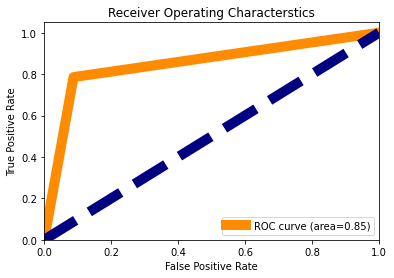

In [217]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(clf_pred,y_test)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,color="darkorange",lw=10, label="ROC curve (area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color="navy", lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characterstics")
plt.legend(loc="lower right")
plt.show()

### The area under curve is 85%.

# SAVING OUR MODEL

In [218]:
import pickle
filename= "HR_Attrition_rf.pkl"
pickle.dump(rf,open(filename,"wb"))

# LOAD THE MODEL

In [219]:
loaded_model=pickle.load(open("HR_Attrition_rf.pkl","rb"))

result= loaded_model.score(x_test,y_test)
print(result)

0.907608695652174


# RESULT:

In [220]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],clf_pred[:]],index=["predicted","original"])

In [221]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,358,359,360,361,362,363,364,365,366,367
predicted,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
original,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# our model is performing very well as we have achieved 90% accuracy.